1. CARGA Y EXPLORACIÓN INICIAL
Primeras 5 filas del dataset:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Estructura del dataset:
- Número de filas: 244
- Número de columnas: 7
- Columnas: ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

Tipos de datos:
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip     

/tmp/ipython-input-3346062787.py:99: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_pct_by_sex = tips.groupby('sex')['tip_pct'].mean()


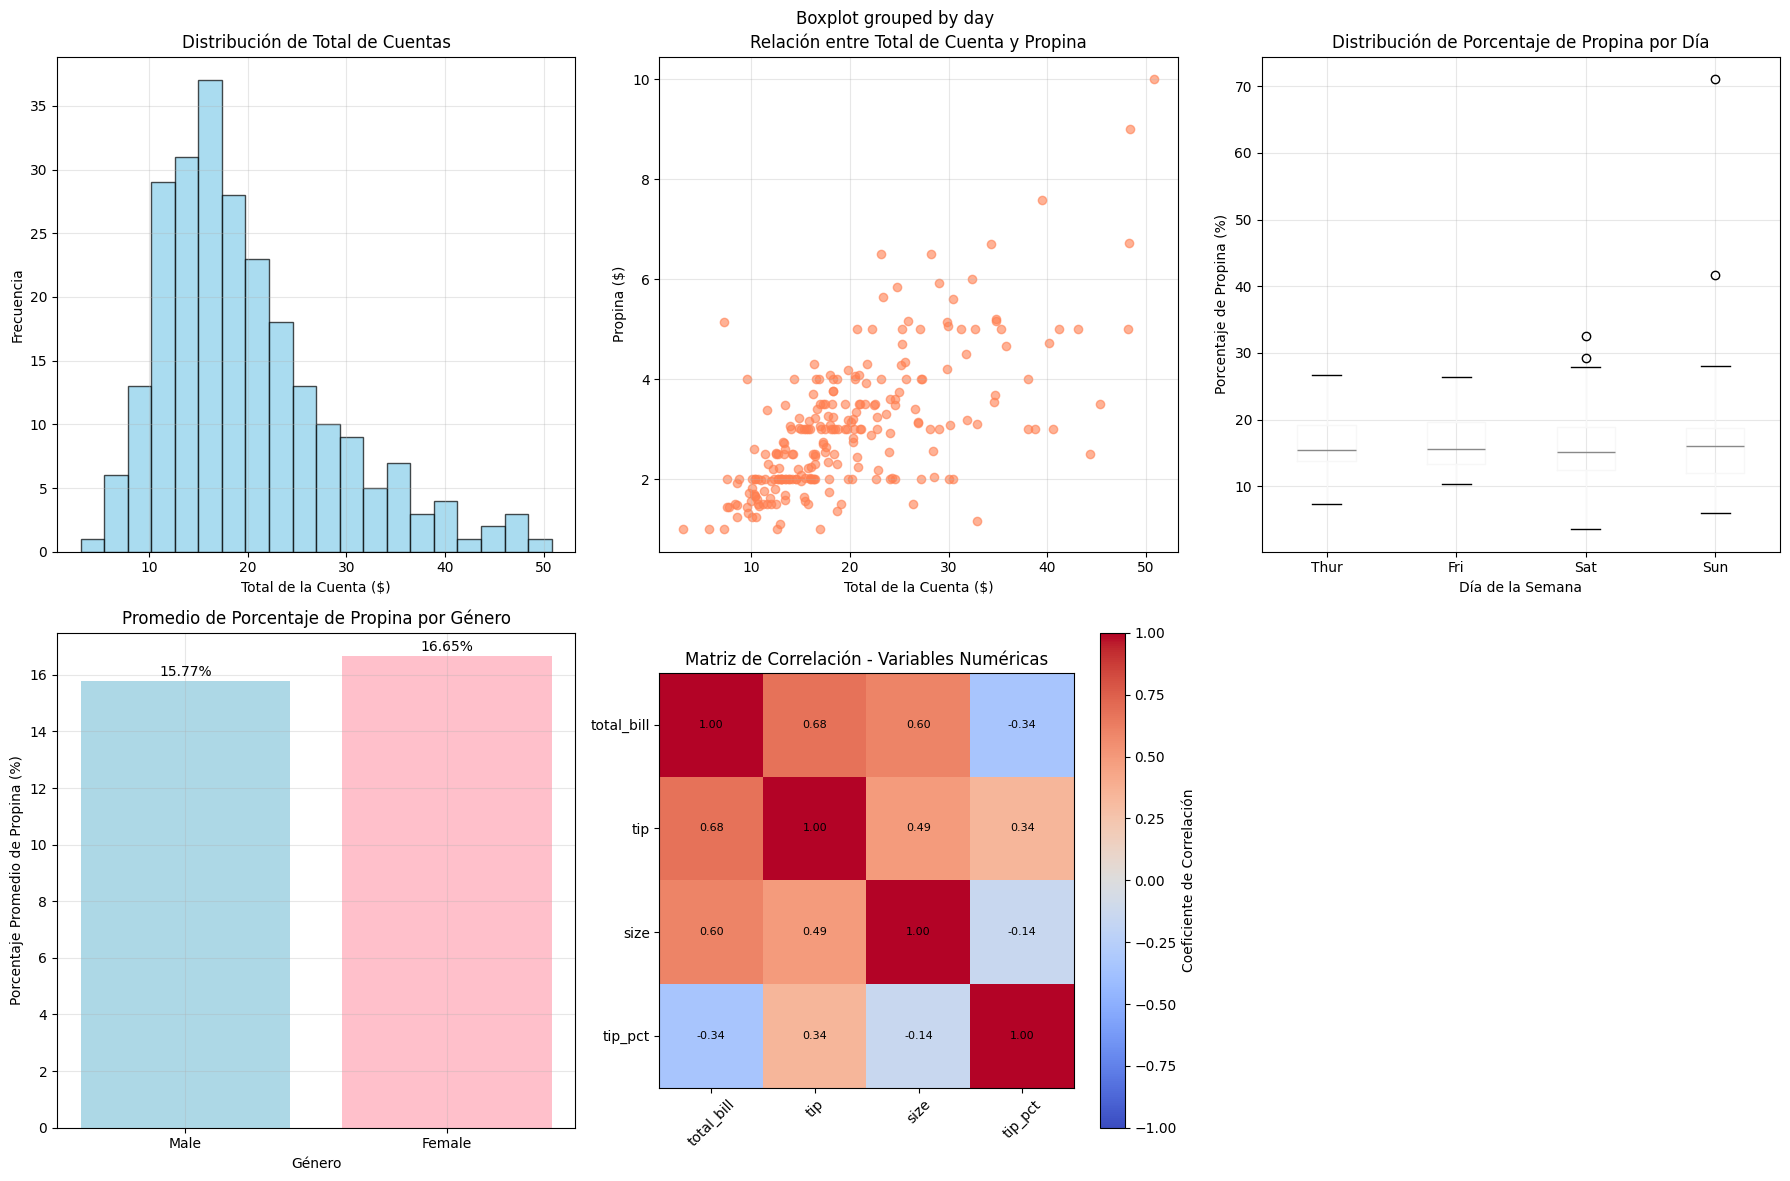

4. ANÁLISIS Y CONCLUSIONES
ANÁLISIS DETALLADO:
Porcentaje de propina por día de la semana:
       mean  median   std
day                      
Thur  16.13   15.38  3.87
Fri   16.99   15.56  4.77
Sat   15.32   15.18  5.13
Sun   16.69   16.11  8.47

→ El día con mayor promedio de propinas porcentuales es Fri con 16.99%

Porcentaje de propina por tipo de comensal:
         mean  count
smoker              
Yes     16.32     93
No      15.93    151

→ Diferencia entre fumadores y no fumadores: 0.39 puntos porcentuales
→ No hay diferencia significativa entre fumadores y no fumadores

Correlación entre total de cuenta y propina: 0.676
→ Existe una correlación moderada y positiva
INFORME EJECUTIVO (150-200 palabras)

ANÁLISIS EXPLORATORIO DEL DATASET TIPS - CONCLUSIONES PRINCIPALES

El dataset contiene 244 registros de transacciones en restaurantes sin valores faltantes,
lo que garantiza la integridad del análisis.

PATRONES DE PROPINAS POR DÍA:
Los días viernes presentan un mayor promedio de 

/tmp/ipython-input-3346062787.py:144: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_pct_by_day = tips.groupby('day')['tip_pct'].agg(['mean', 'median', 'std'])
/tmp/ipython-input-3346062787.py:152: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_pct_by_smoker = tips.groupby('smoker')['tip_pct'].agg(['mean', 'count'])


In [1]:
# Módulo 8 - Sesión N° 1
# Análisis Exploratorio y Visualización del Dataset "tips" de Seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configurar estilo de visualización
plt.style.use('default')
sns.set_palette("husl")

# 1. CARGA Y EXPLORACIÓN INICIAL
print("1. CARGA Y EXPLORACIÓN INICIAL")

# Cargar el dataset tips
tips = sns.load_dataset('tips')

# Mostrar las primeras 5 filas
print("Primeras 5 filas del dataset:")
print(tips.head())

# Estructura del dataset
print(f"\nEstructura del dataset:")
print(f"- Número de filas: {tips.shape[0]}")
print(f"- Número de columnas: {tips.shape[1]}")
print(f"- Columnas: {list(tips.columns)}")

print(f"\nTipos de datos:")
print(tips.dtypes)

print(f"\nInformación general del dataset:")
tips.info()

# Contar valores faltantes
print(f"\nValores faltantes por columna:")
print(tips.isnull().sum())

print(f"\nEstadísticas descriptivas:")
print(tips.describe())

# 2. LIMPIEZA Y PROCESAMIENTO DE DATOS
print("2. LIMPIEZA Y PROCESAMIENTO DE DATOS")

# Verificar valores nulos
null_count = tips.isnull().sum().sum()
print(f"Total de valores nulos en el dataset: {null_count}")

if null_count == 0:
    print("✓ No hay valores nulos en el dataset. No se requiere limpieza adicional.")
else:
    print("Se encontraron valores nulos. Aplicando estrategia de limpieza...")
    # Aquí aplicarías tu estrategia de limpieza

# Crear nueva columna tip_pct
tips['tip_pct'] = (tips['tip'] / tips['total_bill']) * 100

print(f"\n✓ Columna 'tip_pct' creada exitosamente")
print(f"Muestra de la nueva columna tip_pct:")
print(tips[['total_bill', 'tip', 'tip_pct']].head())

# Comprobar rango y distribución de tip_pct
print(f"\nRango y distribución de tip_pct:")
print(f"- Mínimo: {tips['tip_pct'].min():.2f}%")
print(f"- Máximo: {tips['tip_pct'].max():.2f}%")
print(f"- Promedio: {tips['tip_pct'].mean():.2f}%")
print(f"- Mediana: {tips['tip_pct'].median():.2f}%")
print(f"- Desviación estándar: {tips['tip_pct'].std():.2f}%")

# 3. VISUALIZACIONES OBLIGATORIAS
print("3. VISUALIZACIONES OBLIGATORIAS")

# Configurar subplots para las 5 visualizaciones
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análisis Exploratorio del Dataset Tips', fontsize=16, fontweight='bold')

# 1. Histograma de total_bill
axes[0, 0].hist(tips['total_bill'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribución de Total de Cuentas')
axes[0, 0].set_xlabel('Total de la Cuenta ($)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].grid(True, alpha=0.3)

# 2. Scatter plot de total_bill vs tip
axes[0, 1].scatter(tips['total_bill'], tips['tip'], alpha=0.6, color='coral')
axes[0, 1].set_title('Relación entre Total de Cuenta y Propina')
axes[0, 1].set_xlabel('Total de la Cuenta ($)')
axes[0, 1].set_ylabel('Propina ($)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Boxplot de tip_pct por día de la semana
tips.boxplot(column='tip_pct', by='day', ax=axes[0, 2])
axes[0, 2].set_title('Distribución de Porcentaje de Propina por Día')
axes[0, 2].set_xlabel('Día de la Semana')
axes[0, 2].set_ylabel('Porcentaje de Propina (%)')
axes[0, 2].grid(True, alpha=0.3)

# 4. Bar chart del valor medio de tip_pct por género
tip_pct_by_sex = tips.groupby('sex')['tip_pct'].mean()
axes[1, 0].bar(tip_pct_by_sex.index, tip_pct_by_sex.values, color=['lightblue', 'pink'])
axes[1, 0].set_title('Promedio de Porcentaje de Propina por Género')
axes[1, 0].set_xlabel('Género')
axes[1, 0].set_ylabel('Porcentaje Promedio de Propina (%)')
axes[1, 0].grid(True, alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(tip_pct_by_sex.values):
    axes[1, 0].text(i, v + 0.1, f'{v:.2f}%', ha='center', va='bottom')

# 5. Heatmap de correlaciones entre variables numéricas
numeric_cols = tips.select_dtypes(include=[np.number]).columns
correlation_matrix = tips[numeric_cols].corr()

im = axes[1, 1].imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
axes[1, 1].set_title('Matriz de Correlación - Variables Numéricas')
axes[1, 1].set_xticks(range(len(numeric_cols)))
axes[1, 1].set_yticks(range(len(numeric_cols)))
axes[1, 1].set_xticklabels(numeric_cols, rotation=45)
axes[1, 1].set_yticklabels(numeric_cols)

# Agregar valores de correlación en el heatmap
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        text = axes[1, 1].text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                              ha="center", va="center", color="black", fontsize=8)

# Colorbar para el heatmap
cbar = plt.colorbar(im, ax=axes[1, 1])
cbar.set_label('Coeficiente de Correlación')

# Ocultar el último subplot vacío
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# 4. ANÁLISIS Y CONCLUSIONES
print("4. ANÁLISIS Y CONCLUSIONES")

# Análisis por día de la semana
print("ANÁLISIS DETALLADO:")

# ¿En qué día se dan las mayores propinas porcentuales?
tip_pct_by_day = tips.groupby('day')['tip_pct'].agg(['mean', 'median', 'std'])
print("Porcentaje de propina por día de la semana:")
print(tip_pct_by_day.round(2))

best_day = tip_pct_by_day['mean'].idxmax()
best_tip_pct = tip_pct_by_day['mean'].max()
print(f"\n→ El día con mayor promedio de propinas porcentuales es {best_day} con {best_tip_pct:.2f}%")
# Diferencia entre fumadores y no fumadores
tip_pct_by_smoker = tips.groupby('smoker')['tip_pct'].agg(['mean', 'count'])
print(f"\nPorcentaje de propina por tipo de comensal:")
print(tip_pct_by_smoker.round(2))

smoker_diff = tip_pct_by_smoker.loc['Yes', 'mean'] - tip_pct_by_smoker.loc['No', 'mean']
print(f"\n→ Diferencia entre fumadores y no fumadores: {smoker_diff:.2f} puntos porcentuales")

if abs(smoker_diff) > 1:
    print(f"→ Los {'fumadores' if smoker_diff > 0 else 'no fumadores'} tienden a dar propinas más altas")
else:
    print("→ No hay diferencia significativa entre fumadores y no fumadores")

# Relación entre monto de cuenta y propina
correlation_bill_tip = tips['total_bill'].corr(tips['tip'])
print(f"\nCorrelación entre total de cuenta y propina: {correlation_bill_tip:.3f}")

if correlation_bill_tip > 0.7:
    print("→ Existe una correlación fuerte y positiva")
elif correlation_bill_tip > 0.3:
    print("→ Existe una correlación moderada y positiva")
else:
    print("→ La correlación es débil")

print("INFORME EJECUTIVO (150-200 palabras)")

informe = f"""
ANÁLISIS EXPLORATORIO DEL DATASET TIPS - CONCLUSIONES PRINCIPALES

El dataset contiene 244 registros de transacciones en restaurantes sin valores faltantes,
lo que garantiza la integridad del análisis.

PATRONES DE PROPINAS POR DÍA:
Los días viernes presentan un mayor promedio de porcentaje de propinas con un 16,99%,
seguido por los otros días de la semana.
Esta variación sugiere que los patrones de consumo y generosidad cambian según el día.

COMPORTAMIENTO POR TIPO DE COMENSAL:
Los fumadores dan propinas ligeramente más altas la diferencia de 0.39%.
Sin embargo, esta diferencia no es muy pronunciada, sugiriendo que
el hábito de fumar tiene poco impacto en las propinas.

RELACIÓN CUENTA-PROPINA:
La correlación entre el monto total y la propina es 0.676, indicando una moderada
relación positiva. Esto significa que a mayor cuenta, generalmente
mayor propina, aunque el porcentaje puede variar.

RECOMENDACIÓN: Los restaurantes pueden optimizar ingresos por propinas enfocándose
en mejorar el servicio los viernes y considerando estrategias diferenciadas
según el perfil del cliente.
"""

print(informe)

